In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
dataset = pd.read_csv('calculations.csv')

In [58]:
dataset

,Name,Ratio,Time,Size,Parameters,Type
0,FPC,1.269708,353950300,8388608,-,C
1,FPC,1.269708,132027300,8388608,-,D
2,BitGrooming,7.090447,380107900,8388608,NSD1,C
3,BitGrooming,7.090447,65338700,8388608,NSD1,D
4,BitGrooming,4.243432,477125400,8388608,NSD2,C
...,...,...,...,...,...,...
61199,K2Raster,1018.039806,114818800,32768,-,D
61200,K2Raster,1018.039806,14482075700,32768,-,C
61201,K2Raster,1018.039806,153591900,32768,-,D
61202,K2Raster,1018.039806,14433759600,32768,-,C


In [59]:
print(pd.unique(dataset['Name']))

['FPC' 'BitGrooming' 'BitShaving' 'DigitRouting' 'K2Raster']


In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61204 entries, 0 to 61203
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        61204 non-null  object 
 1   Ratio       61204 non-null  float64
 2   Time        61204 non-null  int64  
 3   Size        61204 non-null  int64  
 4   Parameters  61204 non-null  object 
 5   Type        61204 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.8+ MB


# Graph of the dependence of the compression time on the file size<br>

In [61]:
FPC = dataset[(dataset['Name'] == 'FPC') & (dataset['Type'] == 'C')]
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'C')]
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'C')]
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'C')]
K2Raster = dataset[(dataset['Name'] == 'K2Raster') & (dataset['Type'] == 'C')]

In [62]:
FPCTS = FPC[['Time', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BSH3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DR3 = DR[DR['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
K2RasterS = K2Raster[['Time', 'Size']].groupby(['Size']).mean()

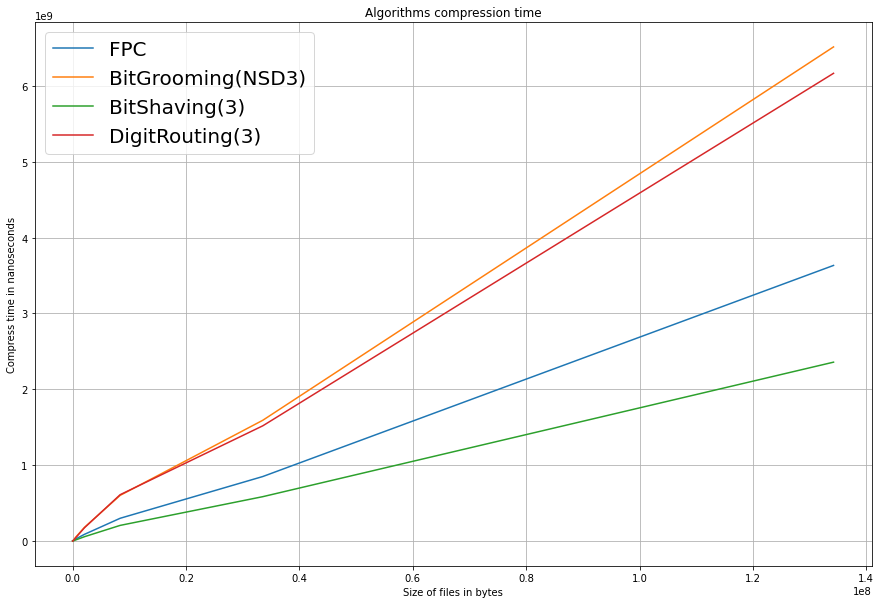

In [63]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
#plt.plot(K2RasterS['Time'], label = 'K2Raster')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the decompression time on the file size<br>

In [64]:
FPC = dataset[(dataset['Name'] == 'FPC') & (dataset['Type'] == 'D')]
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'D')]
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'D')]
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'D')]
K2Raster = dataset[(dataset['Name'] == 'K2Raster') & (dataset['Type'] == 'D')]

In [65]:
FPCTS = FPC[['Time', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BSH3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DR3 = DR[DR['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
K2RasterS = K2Raster[['Time', 'Size']].groupby(['Size']).mean()

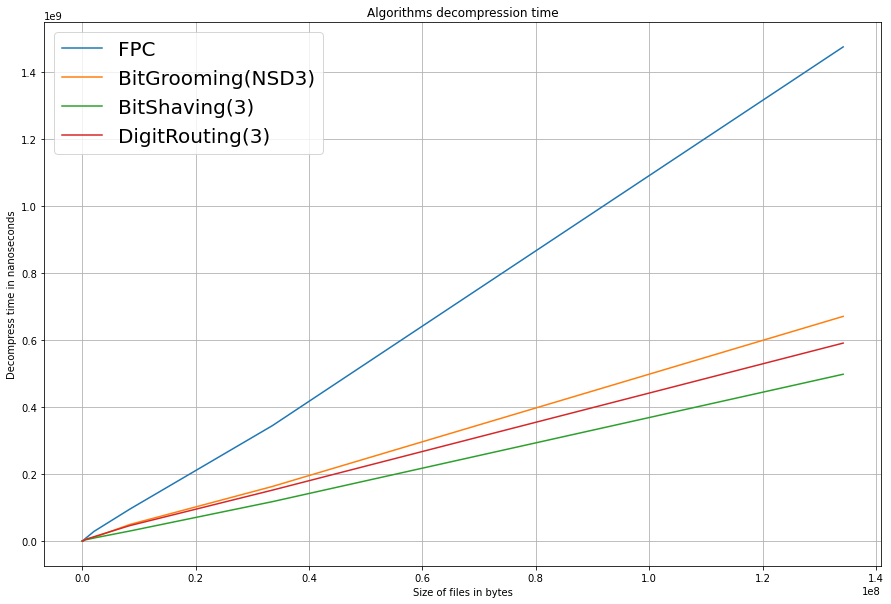

In [66]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Time'], label = 'FPC')
plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Time'], label = 'BitShaving(3)')
plt.plot(DR3['Time'], label = 'DigitRouting(3)')
#plt.plot(K2RasterS['Time'], label = 'K2Raster')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the BitGrooming compression and decompression time on the file size<br>

## Compression

In [67]:
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'C')]
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BGTS7 = BG[BG['Parameters'] == 'NSD7'][['Time', 'Size']].groupby(['Size']).mean()
BGTS13 = BG[BG['Parameters'] == 'NSD13'][['Time', 'Size']].groupby(['Size']).mean()

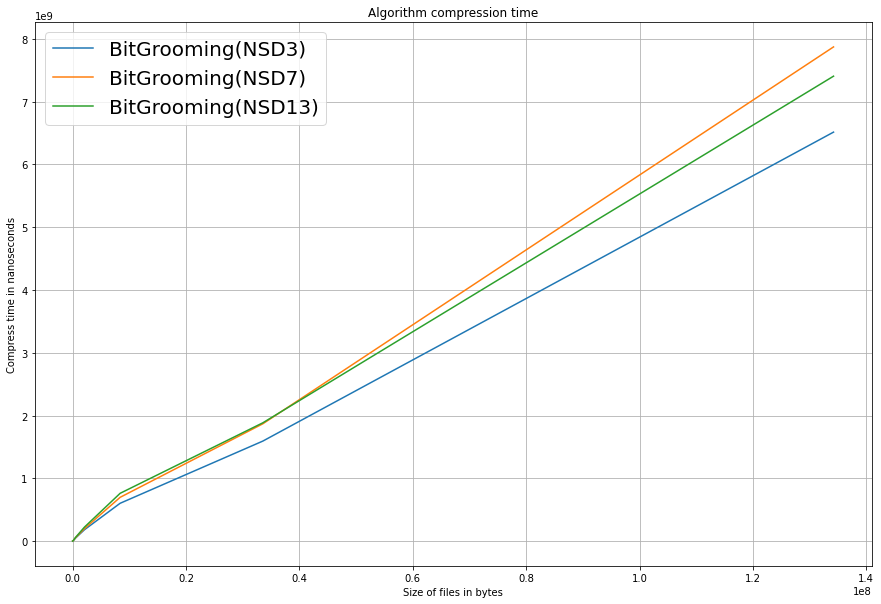

In [68]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BGTS7['Time'], label = 'BitGrooming(NSD7)')
plt.plot(BGTS13['Time'], label = 'BitGrooming(NSD13)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

## Decompression

In [69]:
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'D')]
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Time', 'Size']].groupby(['Size']).mean()
BGTS7 = BG[BG['Parameters'] == 'NSD7'][['Time', 'Size']].groupby(['Size']).mean()
BGTS13 = BG[BG['Parameters'] == 'NSD13'][['Time', 'Size']].groupby(['Size']).mean()

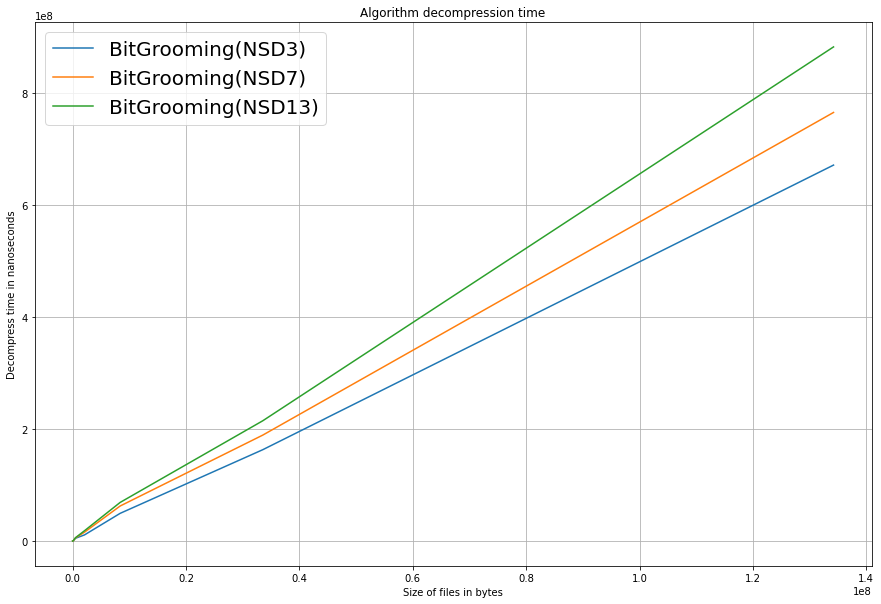

In [70]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS3['Time'], label = 'BitGrooming(NSD3)')
plt.plot(BGTS7['Time'], label = 'BitGrooming(NSD7)')
plt.plot(BGTS13['Time'], label = 'BitGrooming(NSD13)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the BitShaving compression and decompression time on the file size<br>

## Compression

In [71]:
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'C')]
BSHTS3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS10 = BSH[BSH['Parameters'] == '10'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS20 = BSH[BSH['Parameters'] == '20'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS30 = BSH[BSH['Parameters'] == '30'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS40 = BSH[BSH['Parameters'] == '40'][['Time', 'Size']].groupby(['Size']).mean()

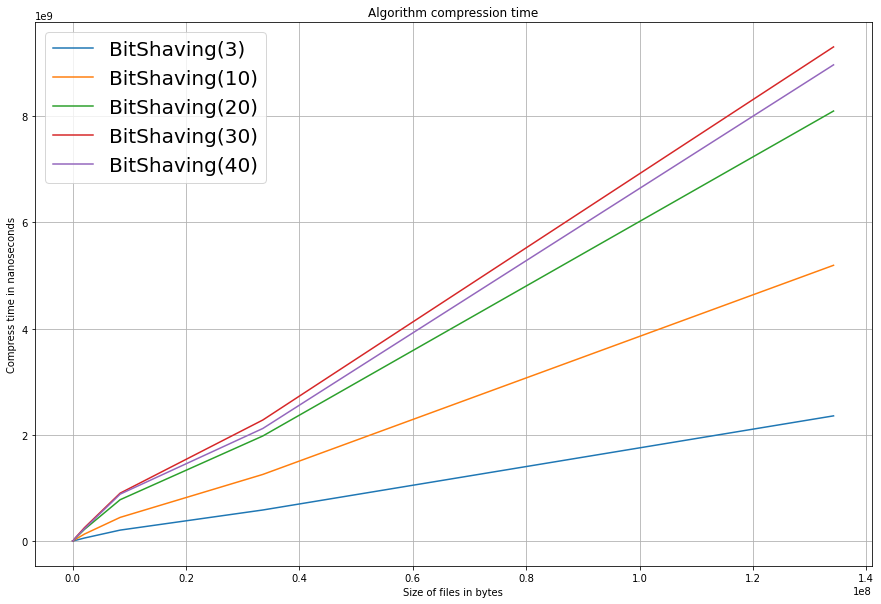

In [72]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Time'], label = 'BitShaving(3)')
plt.plot(BSHTS10['Time'], label = 'BitShaving(10)')
plt.plot(BSHTS20['Time'], label = 'BitShaving(20)')
plt.plot(BSHTS30['Time'], label = 'BitShaving(30)')
plt.plot(BSHTS40['Time'], label = 'BitShaving(40)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

## Decompression

In [73]:
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'D')]
BSHTS3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS10 = BSH[BSH['Parameters'] == '10'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS20 = BSH[BSH['Parameters'] == '20'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS30 = BSH[BSH['Parameters'] == '30'][['Time', 'Size']].groupby(['Size']).mean()
BSHTS40 = BSH[BSH['Parameters'] == '40'][['Time', 'Size']].groupby(['Size']).mean()

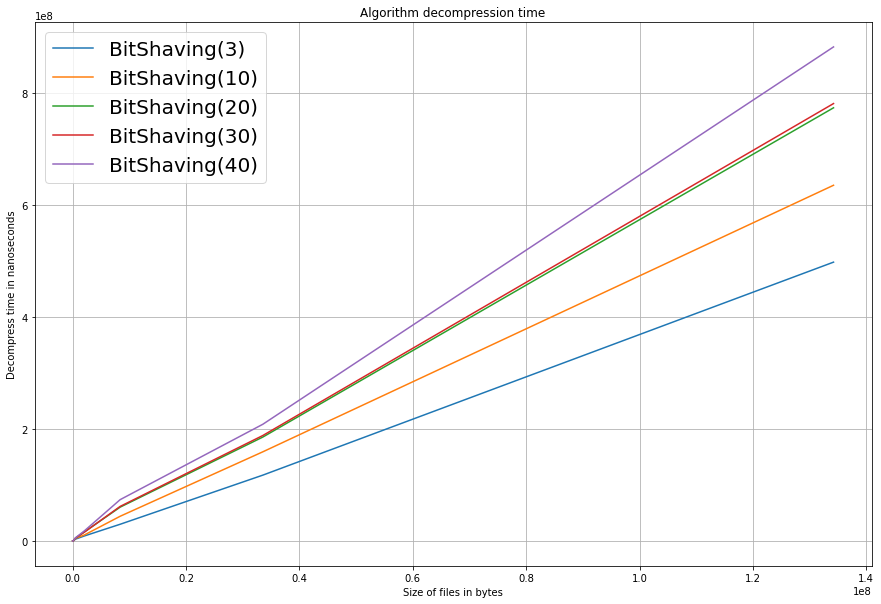

In [74]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Time'], label = 'BitShaving(3)')
plt.plot(BSHTS10['Time'], label = 'BitShaving(10)')
plt.plot(BSHTS20['Time'], label = 'BitShaving(20)')
plt.plot(BSHTS30['Time'], label = 'BitShaving(30)')
plt.plot(BSHTS40['Time'], label = 'BitShaving(40)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the DigitRouting compression and decompression time on the file size<br>

## Compression

In [75]:
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'C')]
DRHTS3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DRTS10 = BSH[BSH['Parameters'] == '10'][['Time', 'Size']].groupby(['Size']).mean()
DRTS20 = BSH[BSH['Parameters'] == '20'][['Time', 'Size']].groupby(['Size']).mean()
DRTS30 = BSH[BSH['Parameters'] == '30'][['Time', 'Size']].groupby(['Size']).mean()
DRTS40 = BSH[BSH['Parameters'] == '40'][['Time', 'Size']].groupby(['Size']).mean()

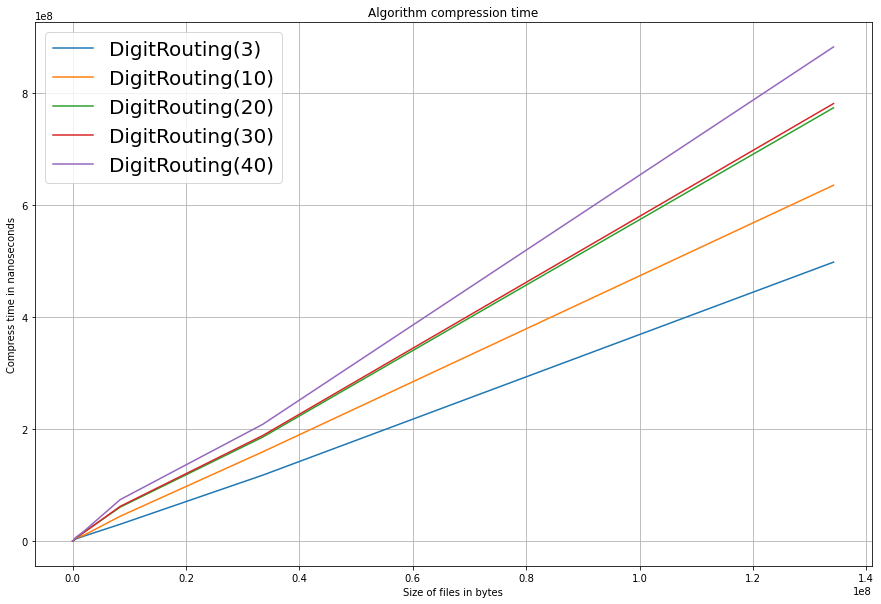

In [76]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Time'], label = 'DigitRouting(3)')
plt.plot(BSHTS10['Time'], label = 'DigitRouting(10)')
plt.plot(BSHTS20['Time'], label = 'DigitRouting(20)')
plt.plot(BSHTS30['Time'], label = 'DigitRouting(30)')
plt.plot(BSHTS40['Time'], label = 'DigitRouting(40)')

plt.ylabel('Compress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

## Decomression

In [77]:
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'C')]
DRHTS3 = BSH[BSH['Parameters'] == '3'][['Time', 'Size']].groupby(['Size']).mean()
DRTS10 = BSH[BSH['Parameters'] == '10'][['Time', 'Size']].groupby(['Size']).mean()
DRTS20 = BSH[BSH['Parameters'] == '20'][['Time', 'Size']].groupby(['Size']).mean()
DRTS30 = BSH[BSH['Parameters'] == '30'][['Time', 'Size']].groupby(['Size']).mean()
DRTS40 = BSH[BSH['Parameters'] == '40'][['Time', 'Size']].groupby(['Size']).mean()

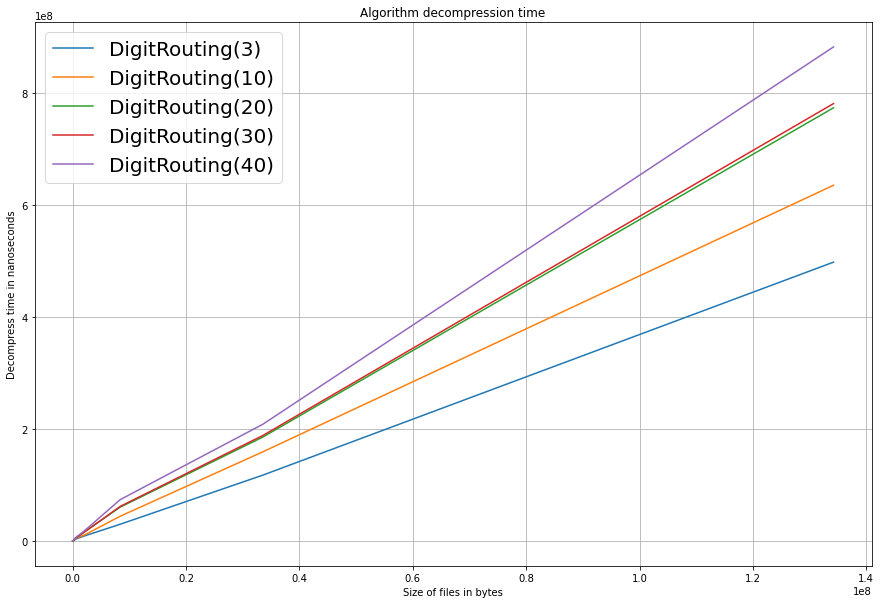

In [78]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Time'], label = 'DigitRouting(3)')
plt.plot(BSHTS10['Time'], label = 'DigitRouting(10)')
plt.plot(BSHTS20['Time'], label = 'DigitRouting(20)')
plt.plot(BSHTS30['Time'], label = 'DigitRouting(30)')
plt.plot(BSHTS40['Time'], label = 'DigitRouting(40)')

plt.ylabel('Decompress time in nanoseconds')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm decompression time')
plt.legend(loc=2, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size<br>

In [79]:
FPCTS = FPC[['Ratio', 'Size']].groupby(['Size']).mean()
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Ratio', 'Size']].groupby(['Size']).mean()
BSH3 = BSH[BSH['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
DR3 = DR[DR['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
K2RasterR = K2Raster[['Ratio', 'Size']].groupby(['Size']).mean()

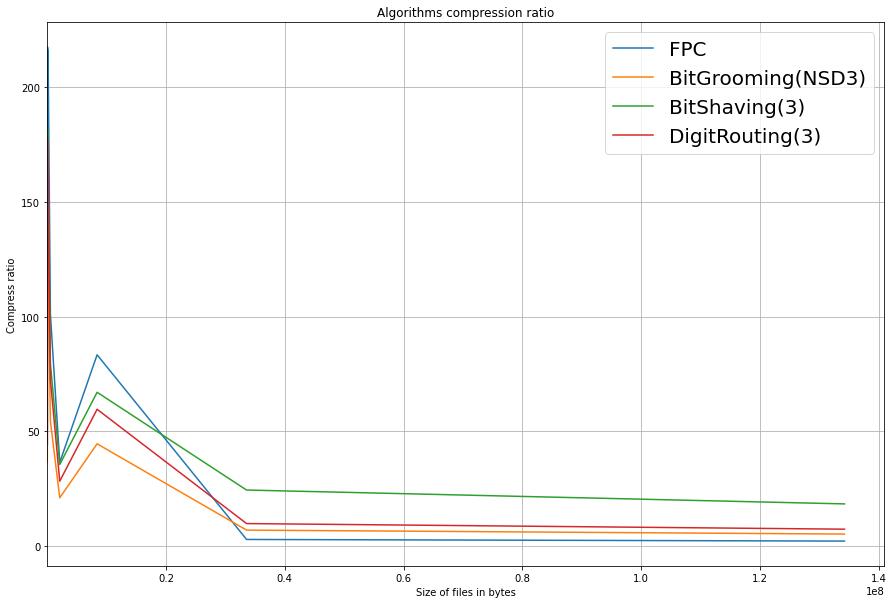

In [80]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(FPCTS['Ratio'], label = 'FPC')
plt.plot(BGTS3['Ratio'], label = 'BitGrooming(NSD3)')
plt.plot(BSH3['Ratio'], label = 'BitShaving(3)')
plt.plot(DR3['Ratio'], label = 'DigitRouting(3)')
#plt.plot(K2RasterR['Ratio'], label = 'K2Raster')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithms compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for BitGrooming<br>

In [81]:
BG = dataset[(dataset['Name'] == 'BitGrooming') & (dataset['Type'] == 'C')]
BGTS3 = BG[BG['Parameters'] == 'NSD3'][['Ratio', 'Size']].groupby(['Size']).mean()
BGTS7 = BG[BG['Parameters'] == 'NSD7'][['Ratio', 'Size']].groupby(['Size']).mean()
BGTS13 = BG[BG['Parameters'] == 'NSD13'][['Ratio', 'Size']].groupby(['Size']).mean()

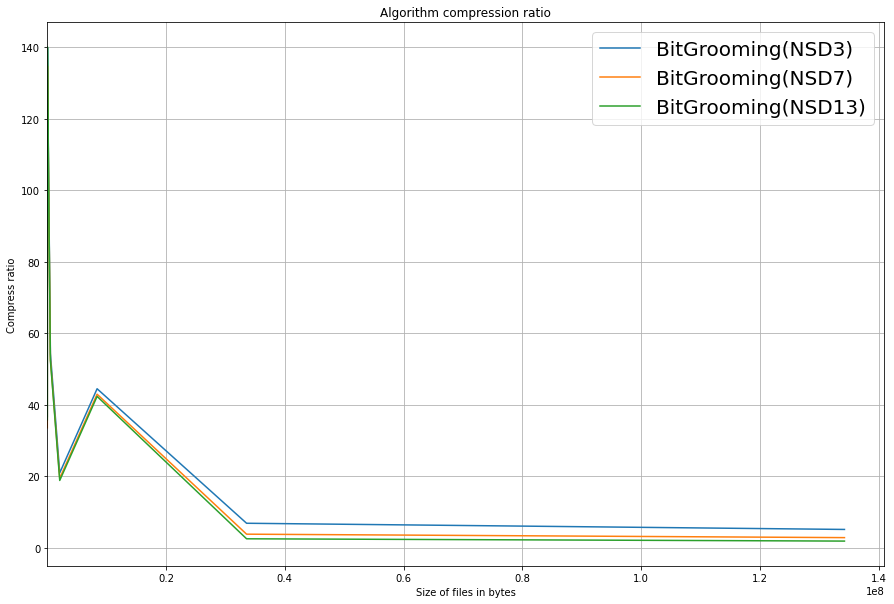

In [82]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BGTS3['Ratio'], label = 'BitGrooming(NSD3)')
plt.plot(BGTS7['Ratio'], label = 'BitGrooming(NSD7)')
plt.plot(BGTS13['Ratio'], label = 'BitGrooming(NSD13)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for BitShaving<br>

In [83]:
BSH = dataset[(dataset['Name'] == 'BitShaving') & (dataset['Type'] == 'C')]
BSHTS3 = BSH[BSH['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
BSHTS10 = BSH[BSH['Parameters'] == '10'][['Ratio', 'Size']].groupby(['Size']).mean()
BSHTS20 = BSH[BSH['Parameters'] == '20'][['Ratio', 'Size']].groupby(['Size']).mean()
BSHTS30 = BSH[BSH['Parameters'] == '30'][['Ratio', 'Size']].groupby(['Size']).mean()
BSHTS40 = BSH[BSH['Parameters'] == '40'][['Ratio', 'Size']].groupby(['Size']).mean()

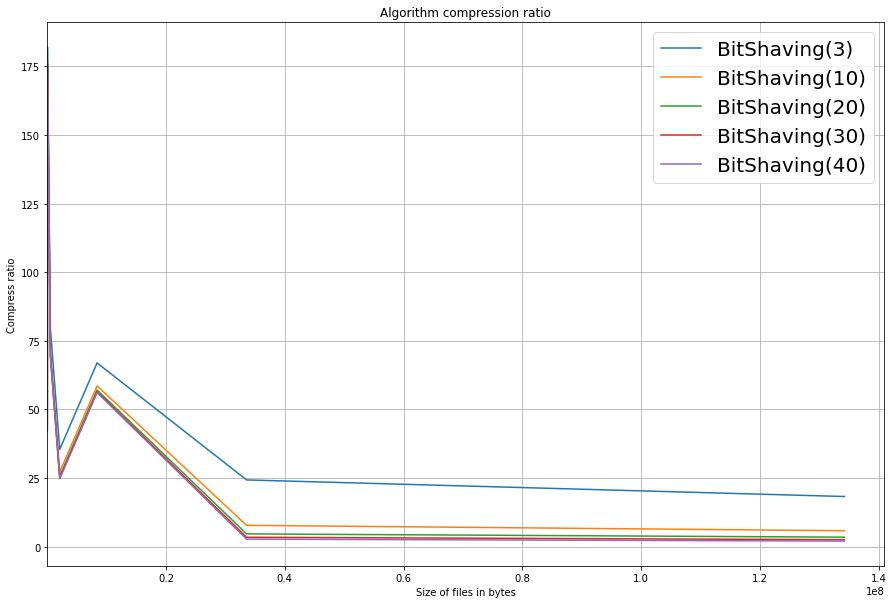

In [84]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(BSHTS3['Ratio'], label = 'BitShaving(3)')
plt.plot(BSHTS10['Ratio'], label = 'BitShaving(10)')
plt.plot(BSHTS20['Ratio'], label = 'BitShaving(20)')
plt.plot(BSHTS30['Ratio'], label = 'BitShaving(30)')
plt.plot(BSHTS40['Ratio'], label = 'BitShaving(40)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()

# Graph of the dependence of the compress ratio on the file size for DigitRouting

In [85]:
DR = dataset[(dataset['Name'] == 'DigitRouting') & (dataset['Type'] == 'C')]
DRTS3 = DR[DR['Parameters'] == '3'][['Ratio', 'Size']].groupby(['Size']).mean()
DRTS5 = DR[DR['Parameters'] == '5'][['Ratio', 'Size']].groupby(['Size']).mean()
DRTS7 = DR[DR['Parameters'] == '7'][['Ratio', 'Size']].groupby(['Size']).mean()
DRTS10 = DR[DR['Parameters'] == '10'][['Ratio', 'Size']].groupby(['Size']).mean()
DRTS15 = DR[DR['Parameters'] == '15'][['Ratio', 'Size']].groupby(['Size']).mean()

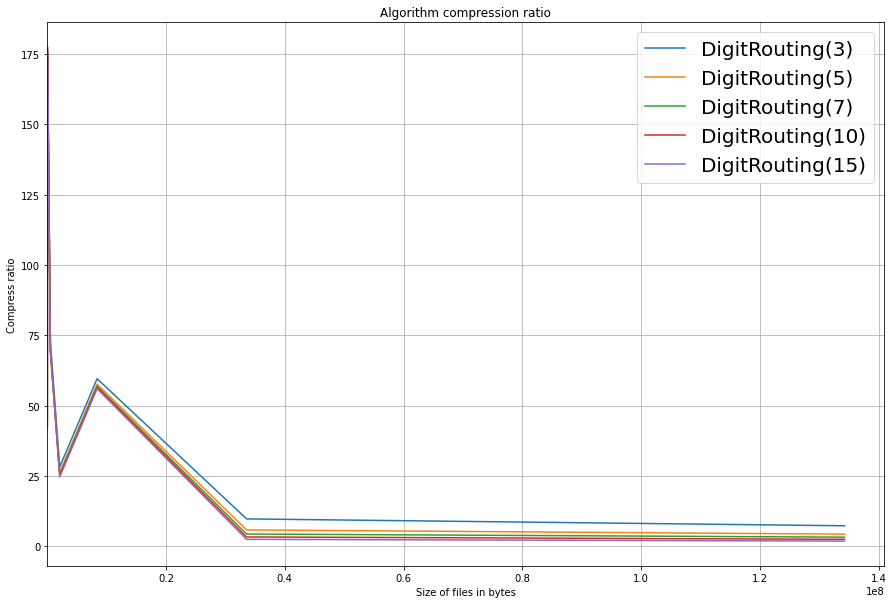

In [86]:
plt.figure(figsize = [15,10])
plt.grid(True)

plt.plot(DRTS3['Ratio'], label = 'DigitRouting(3)')
plt.plot(DRTS5['Ratio'], label = 'DigitRouting(5)')
plt.plot(DRTS7['Ratio'], label = 'DigitRouting(7)')
plt.plot(DRTS10['Ratio'], label = 'DigitRouting(10)')
plt.plot(DRTS15['Ratio'], label = 'DigitRouting(15)')

plt.xlim(8192)
plt.ylabel('Compress ratio')
plt.xlabel('Size of files in bytes')
plt.title('Algorithm compression ratio')
plt.legend(loc=1, prop={'size': 20})
plt.show()